In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [44]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1, noise=20)

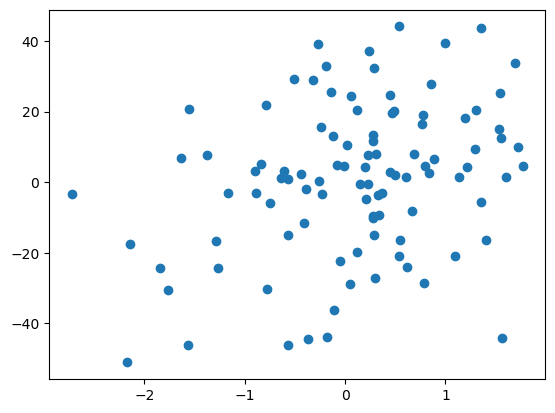

In [45]:
plt.scatter(x,y)

# Now first implement Ols linear Regression

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [114]:
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[6.4208511]
2.368556170613692


In [56]:
m = lr.coef_

# Now making a Class of Gradient descent where we assume we know the value of m

In [57]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = m
        self.b = -100 # packing any random value
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,x,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope = -2*np.sum(y-self.m*x.ravel() -self.b)
            self.b = self.b - (self.lr*loss_slope)

            print(loss_slope,self.b)

        print(self.b)
            


In [58]:
gd = GDRegressor(0.001,100)

In [115]:
gd.fit(x_train,y_train)

6.42085109516939 2.3685561706136924


# Now doing gradient for both parameters m and b

In [108]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 10 # packing any random value
        self.b = -10 # packing any random value
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,x,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y-self.m*x.ravel() -self.b)
            self.b = self.b - (self.lr*loss_slope_b)

            loss_slope_m = -2 * np.sum((y- self.m*x.ravel() -self.b)*x.ravel())
            self.m = self.m- (self.lr*loss_slope_m)
            

        print(self.m,self.b)
    def predict(self,x):
        return self.m*x + self.b

In [109]:
gd = GDRegressor(0.01,100)

In [116]:
gd.fit(x_train,y_train)

6.42085109516939 2.3685561706136924


In [119]:
y_pred=gd.predict(x_test)

In [121]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.20085810995811015